# Breast Cancer Diagnosis

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/Applied_Data_Science_with_Python_Specialization/portfolio-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Create a classifier that can help diagnose breast cancer.

## Import libraries

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Load the dataset

In [2]:
data = load_breast_cancer(as_frame=True)
df = data.frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Understand the dataset

The [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) dataset is a classic binary classification dataset.

In [3]:
print(data.DESCR[:1000], end="...")

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Visualize some features of the dataset

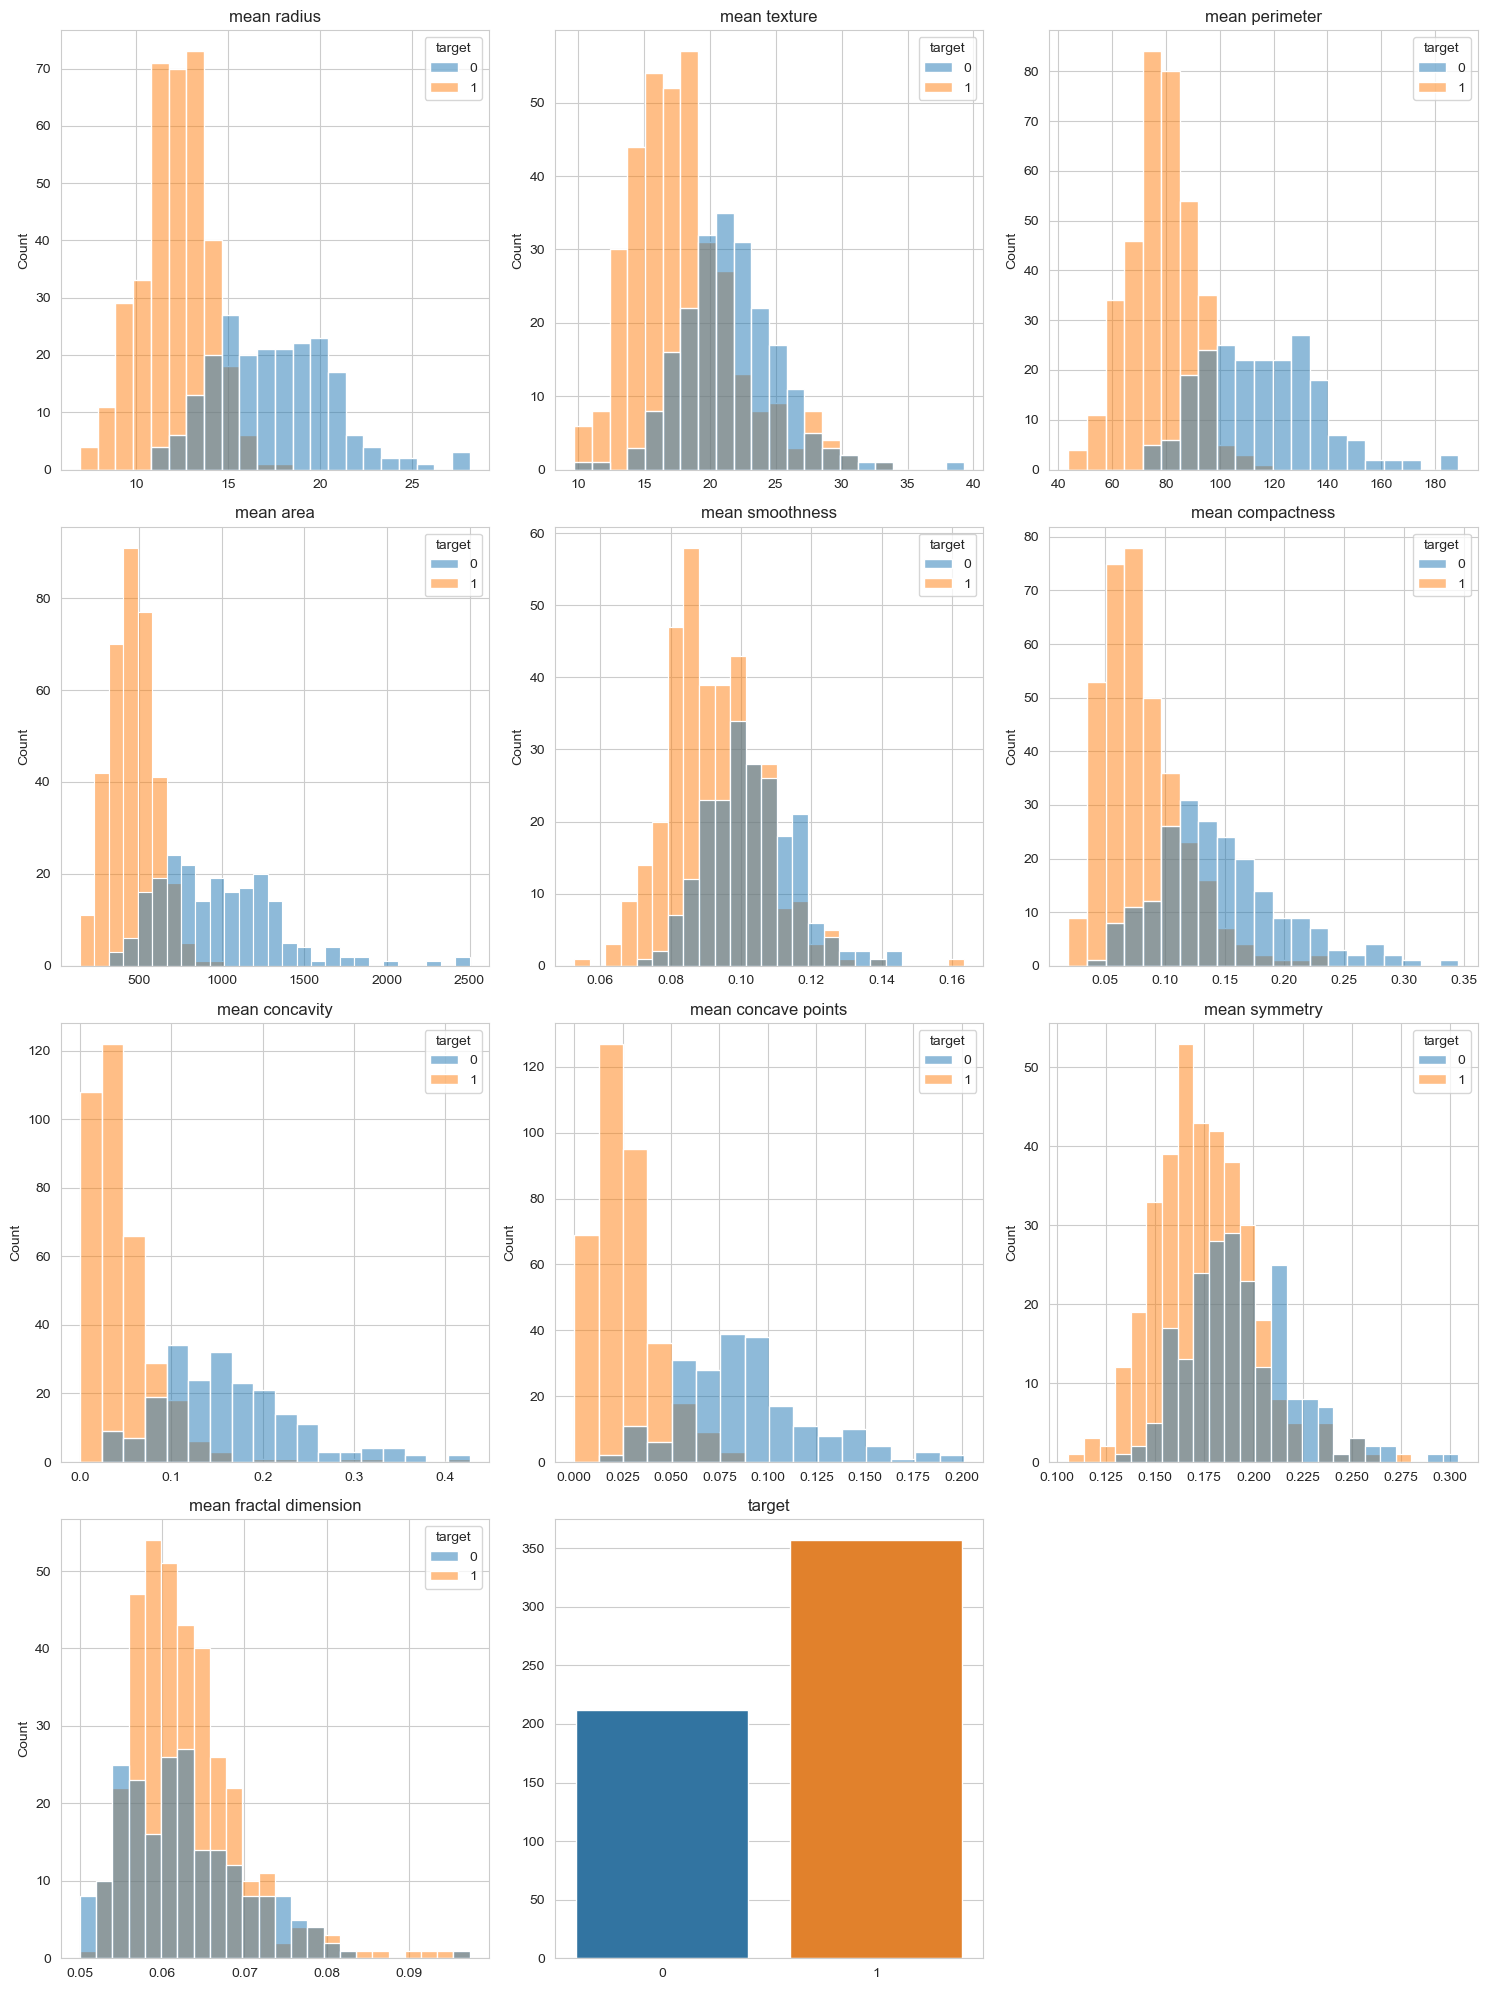

In [5]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for ax, feature in zip(axs.flatten(), list(df.columns[:10]) + ["target"]):
    if len(df[feature].unique()) <= 10:
        labels, sizes = np.unique(df[feature], return_counts=True)
        sns.barplot(x=labels, y=sizes, hue=labels, ax=ax, palette="tab10", legend=False)
        ax.set_xlabel("")
        ax.set_title(feature)
    else:
        sns.histplot(data=df, x=feature, ax=ax, hue="target")
        ax.set_xlabel("")
        ax.set_title(feature)

axs[3, 2].axis("off")
plt.tight_layout()
plt.show()

## Visualize the class distribution

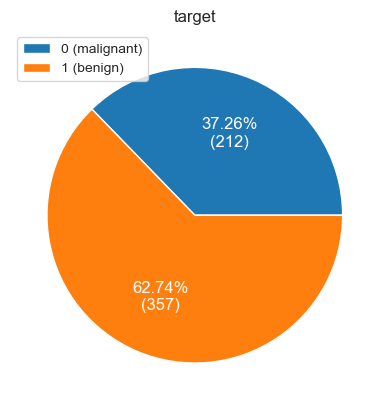

In [6]:
labels, sizes = np.unique(df["target"], return_counts=True)

fig, ax = plt.subplots()
ax.pie(sizes, textprops={'color': "w", 'fontsize': '12'}, autopct=lambda pct: "{:.2f}%\n({:d})".format(pct, round(pct/100 * sum(sizes))))
ax.legend([str(i) + " (malignant)" if i == 0 else str(i) + " (benign)" for i in labels])
ax.set_title("target")
plt.show()

## Split the dataset into train and test subsets

In [7]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (426, 30)
X_test shape: (143, 30)


## Find the optimal number of neighbors for a *k*-Nearest Neighbors classifier

In [8]:
n_neighbors = range(1, 21)
parameters = {'n_neighbors': n_neighbors}

knn_classifier = KNeighborsClassifier()
clf = GridSearchCV(knn_classifier, parameters, scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='recall')

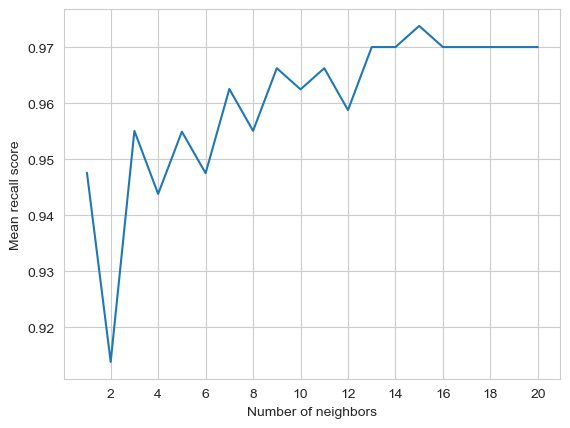

In [9]:
plt.figure()
plt.plot(n_neighbors, clf.cv_results_['mean_test_score'])
plt.xlabel("Number of neighbors")
plt.ylabel("Mean recall score")
plt.xticks(n_neighbors[::-2])
plt.show()

## Evaluate the model

              precision    recall  f1-score   support

           0     0.9608    0.9245    0.9423        53
           1     0.9565    0.9778    0.9670        90

    accuracy                         0.9580       143
   macro avg     0.9587    0.9512    0.9547       143
weighted avg     0.9581    0.9580    0.9579       143



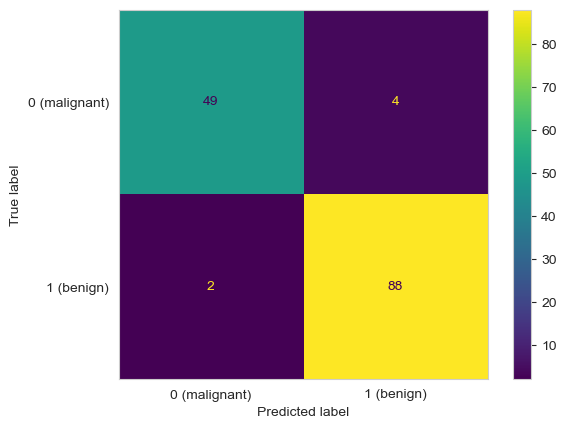

In [10]:
y_pred = clf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (malignant)", "1 (benign)"])
plt.grid(False)
plt.show()